In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
CTD = xr.open_dataset("dfo-bb046-20201006_Hakai_shipCTD.nc")
CTD

<xarray.Dataset>
Dimensions:           (index: 278)
Coordinates:
  * index             (index) int64 0 1 2 3 4 5 6 ... 272 273 274 275 276 277
Data variables:
    Measurement_time  (index) object ...
    Depth             (index) float64 ...
    Drop_speed        (index) float64 ...
    Conductivity      (index) float64 ...
    Temperature       (index) float64 ...
    Pressure          (index) int64 ...
    Dissolved_O2      (index) float64 ...
    Salinity          (index) float64 ...
Attributes: (12/18)
    Cast_PK:               15791
    Hakai_ID:              018032_2020-10-06T22:10:13.500Z
    Filename:              018032_20201006_1713
    CTD_model:             XRX-620
    CTD_serial_number:     18032
    CTD_firmware_version:  6.81
    ...                    ...
    Target_depth_(m):      320
    Latitude:              51.72143069
    Longitude:             -128.0582176
    Operators:             emma.myers
    Cast_Direction:        d
    Weather:               {"tide":null,"sky_cover":"partly_cloudy","wind_spe...

In [3]:
glider = xr.open_dataset("dfo-bb046-20201006_L2_modified.nc")
glider

<xarray.Dataset>
Dimensions:               (time: 1873927)
Coordinates:
  * time                  (time) datetime64[ns] 2020-10-06T22:00:00.451000064...
    latitude              (time) float64 ...
    longitude             (time) float64 ...
    depth                 (time) float64 ...
Data variables:
    conductivity          (time) float64 ...
    temperature           (time) float64 ...
    pressure              (time) float64 ...
    oxygen_concentration  (time) float64 ...
    temperature_oxygen    (time) float64 ...
    profile_index         (time) float64 ...
    profile_direction     (time) float64 ...
    salinity              (time) float64 ...
Attributes: (12/81)
    Conventions:                             CF-1.6
    Metadata_Conventions:                    CF-1.6, Unidata Dataset Discover...
    acknowledgement:                         Funding from Fisheries and Ocean...
    cdm_data_type:                           Trajectory
    comment:                                 Calvert Island deployment
    contributor_name:                        James Pegg, Jody Klymak, Tetjana...
    ...                                      ...
    glider_devices_optics_serial:            4741
    glider_devices_optics_calibration_date:  20180807
    glider_devices_oxygen_make:              AROD_FT
    glider_devices_oxygen_model:             Optode4831
    glider_devices_oxygen_serial:            0022
    glider_devices_oxygen_calibration_date:  20191207

In [4]:
index = glider.profile_index
depth = glider.depth
oxygen = glider.oxygen_concentration

## Question 1
make a pandas dataframe of the important variables

In [5]:
d = {'lat':glider.latitude, 'lon':glider.longitude, 'depth':glider.depth, 'pressure':glider.pressure, 'oxygen':glider.oxygen_concentration,'salinity':glider.salinity,'temperature':glider.temperature,'conductivity':glider.conductivity,'profile_index':glider.profile_index}
df = pd.DataFrame(data=d)

#### turn any field with salinity < 25 to nan

In [6]:
df.salinity = np.where(df.salinity > 25, df.salinity, np.nan)
df.dropna(inplace=True)

In [7]:
df

,lat,lon,depth,pressure,oxygen,salinity,temperature,conductivity,profile_index
93,51.721033,-128.060080,4.173378,4.21,349.694808,29.774116,13.2450,3.57843,0.0
94,51.721033,-128.060079,5.164666,5.21,348.997599,28.418583,12.8710,3.40143,0.0
95,51.721033,-128.060078,5.987432,6.04,348.296959,29.698581,12.7500,3.52922,0.0
96,51.721033,-128.060077,6.730893,6.79,347.601809,29.712849,12.6983,3.52637,0.0
97,51.721033,-128.060076,7.414874,7.48,346.901855,29.700029,12.6608,3.52179,0.0
...,...,...,...,...,...,...,...,...,...
1871749,51.728488,-128.039263,1.001222,1.01,308.381194,28.928762,10.2224,3.22636,901.0
1871750,51.728486,-128.039265,1.090439,1.10,308.395831,28.933442,10.2217,3.22678,901.0
1871751,51.728483,-128.039267,1.040874,1.05,308.410527,28.938227,10.2203,3.22715,901.0
1871756,51.728475,-128.039280,1.070613,1.08,308.483917,28.954816,10.2190,3.22872,901.0


#### lets plot a few profiles

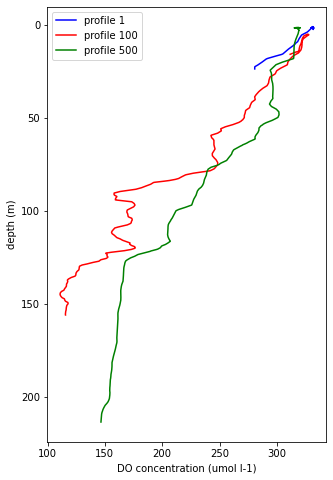

In [8]:
fig, ax = plt.subplots(1,1,figsize=(5,8))
ax.plot(df.oxygen[df.profile_index==1.0],df.depth[df.profile_index==1.0], 'b',label='profile 1')
ax.plot(df.oxygen[df.profile_index==100.0],df.depth[df.profile_index==100.0],'r',label='profile 100')
ax.plot(df.oxygen[df.profile_index==500.0],df.depth[df.profile_index==500.0],'g',label='profile 500')
ax.legend()
ax.set_ylabel('depth (m)')
ax.set_xlabel('DO concentration (umol l-1)')
ax.invert_yaxis()

# Question 2

In [9]:
B0 = -6.4523*10**-3
B1 = -7.37614*10**-3
B2 = -1.03410*10**-2
B3 = -8.17083*10**-3
C0 = -4.88682*10**-7

D0 = 24.4543
D1 = -67.4509
D2 = -4.8489
D3 = -5.44*10**4

In [10]:
Ts = np.log((298.15-df.temperature)/(273.15+df.temperature))

In [11]:
Tabs = df.temperature + 273.15

In [12]:
Spreset = 0
Sref = 0

In [13]:
def partial_pressure(salinity):
    p= 1013.25*np.e**(D0+D1*(100/Tabs)+D2*np.log(Tabs/100)+D3*salinity)
    return p

In [14]:
A = (1013.25-partial_pressure(Spreset))/1013.25-partial_pressure(df.salinity)

In [15]:
Scorr = A*np.e**((df.salinity-Sref)*(B0+B1*Ts+B2*Ts**2+B3*Ts**3)+C0*(df.salinity**2-Sref**2))

In [16]:
#salinity corrected DO
DOs = df.oxygen*Scorr

In [17]:
Pcoef2 = 0.00025
Pcoef3 = 0.0328

In [18]:
df['DOsp'] = DOs*(1+((Pcoef2*df.temperature + Pcoef3)*df.pressure)/1000)

In [19]:
df

,lat,lon,depth,pressure,oxygen,salinity,temperature,conductivity,profile_index,DOsp
93,51.721033,-128.060080,4.173378,4.21,349.694808,29.774116,13.2450,3.57843,0.0,284.486949
94,51.721033,-128.060079,5.164666,5.21,348.997599,28.418583,12.8710,3.40143,0.0,286.370206
95,51.721033,-128.060078,5.987432,6.04,348.296959,29.698581,12.7500,3.52922,0.0,283.430672
96,51.721033,-128.060077,6.730893,6.79,347.601809,29.712849,12.6983,3.52637,0.0,282.838258
97,51.721033,-128.060076,7.414874,7.48,346.901855,29.700029,12.6608,3.52179,0.0,282.293128
...,...,...,...,...,...,...,...,...,...,...
1871749,51.728488,-128.039263,1.001222,1.01,308.381194,28.928762,10.2224,3.22636,901.0,251.756689
1871750,51.728486,-128.039265,1.090439,1.10,308.395831,28.933442,10.2217,3.22678,901.0,251.761535
1871751,51.728483,-128.039267,1.040874,1.05,308.410527,28.938227,10.2203,3.22715,901.0,251.764876
1871756,51.728475,-128.039280,1.070613,1.08,308.483917,28.954816,10.2190,3.22872,901.0,251.797240


## Question 3

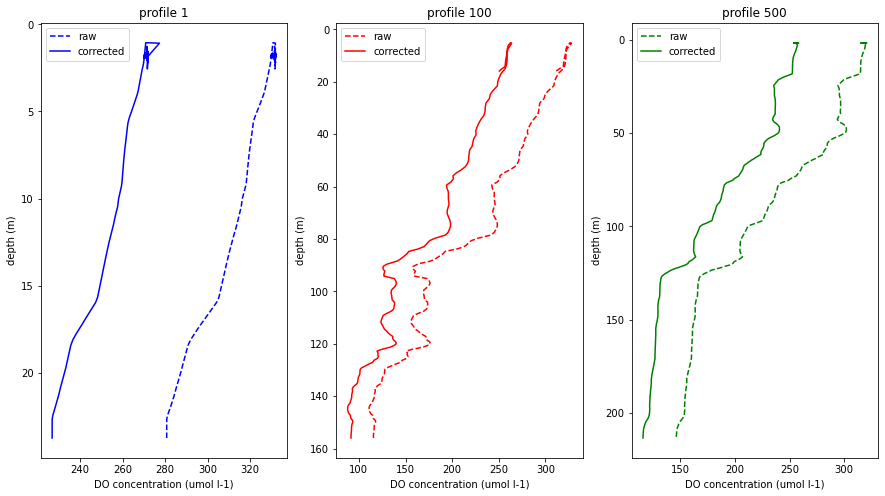

In [20]:
fig, ax = plt.subplots(1,3,figsize=(15,8))

ax[0].plot(df.oxygen[df.profile_index==1.0],df.depth[df.profile_index==1.0], 'b--', label='raw')
ax[0].plot(df.DOsp[df.profile_index==1.0],df.depth[df.profile_index==1.0],'b', label='corrected')
ax[0].legend()
ax[0].set_title('profile 1')
ax[0].set_ylabel('depth (m)')
ax[0].set_xlabel('DO concentration (umol l-1)')
ax[0].invert_yaxis()

ax[1].plot(df.oxygen[df.profile_index==100.0],df.depth[df.profile_index==100.0], 'r--', label='raw')
ax[1].plot(df.DOsp[df.profile_index==100.0],df.depth[df.profile_index==100.0],'r', label='corrected')
ax[1].legend()
ax[1].set_title('profile 100')
ax[1].set_ylabel('depth (m)')
ax[1].set_xlabel('DO concentration (umol l-1)')
ax[1].invert_yaxis()

ax[2].plot(df.oxygen[df.profile_index==500.0],df.depth[df.profile_index==500.0], 'g--', label='raw')
ax[2].plot(df.DOsp[df.profile_index==500.0],df.depth[df.profile_index==500.0],'g', label='corrected')
ax[2].legend()
ax[2].set_title('profile 500')
ax[2].set_ylabel('depth (m)')
ax[2].set_xlabel('DO concentration (umol l-1)')
ax[2].invert_yaxis()

Text(0.5, 0, 'Change in DO concentration (umol l-1)')

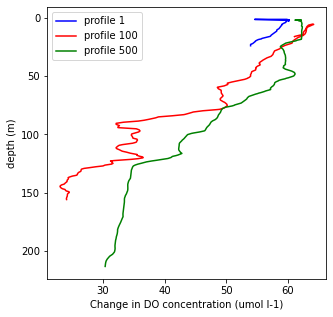

In [21]:
# interested to also plot difference
fig, ax = plt.subplots(1,1,figsize=(5,5))
ax.plot(df.oxygen[df.profile_index==1.0]-df.DOsp[df.profile_index==1.0], df.depth[df.profile_index==1.0], 'b', label='profile 1')
ax.plot(df.oxygen[df.profile_index==100.0]-df.DOsp[df.profile_index==100.0], df.depth[df.profile_index==100.0], 'r', label='profile 100')
ax.plot(df.oxygen[df.profile_index==500.0]-df.DOsp[df.profile_index==500.0], df.depth[df.profile_index==500.0], 'g', label='profile 500')
ax.invert_yaxis()
ax.legend()
ax.set_ylabel('depth (m)')
ax.set_xlabel('Change in DO concentration (umol l-1)')

## Question 4

In [22]:
lat =51.72143069
lon =-128.0582176
diff_lon = np.abs(df.lon - lon)
diff_lat = np.abs(df.lat - lat)

print(df.profile_index[np.argmin(diff_lon+diff_lat)])
print(df.lat[np.argmin(diff_lon+diff_lat)])
print(df.lon[np.argmin(diff_lon+diff_lat)])

2.0
51.72211666666667
-128.05902417188605


In [23]:
gliderO2 = df.DOsp[df.profile_index==2.0]
gliderD =  df.depth[df.profile_index==2.0]
gliderO2

1071    270.640441
1072    270.622852
1073    270.608915
1074    270.603775
1075    270.606276
           ...    
1850    166.585926
1851    166.504319
1852    166.445313
1853    166.379531
1854    166.315653
Name: DOsp, Length: 784, dtype: float64

In [29]:
# convert glider units from umol/l to ml/l using the ideal gas law
R = 8.31446261815324 # [m3 Pa K-1 mol-1]
# pressure is in dbar convert to Pa = dbar*10000
# umol*10**-6 = mol
# mL = m3*10**6 -> cancels out umol conversion
# gliderO2 = ((gliderO2)*R*(df.temperature[df.profile_index==2.0]+273.15))/(df.pressure[df.profile_index==2.0]*10000)
# ctdO2 = ((CTD.Dissolved_O2*10**-6)*(CTD.Pressure*10000))/(R*(CTD.Temperature+273.15))*(10**6)

#even though gas concentration IS pressure dependent it doesnt look liek the measurement is pressure dependent!
ctd_O2 = (CTD.Dissolved_O2*1e-3/22.4)*1e6 # micromol/L

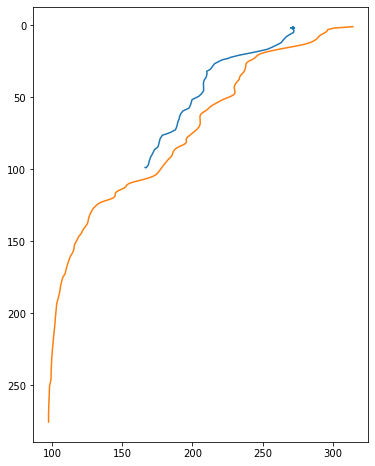

In [30]:
fig, ax = plt.subplots(1,1,figsize=(6,8))
ax.plot(gliderO2, gliderD)
ax.plot(ctd_O2, CTD.Depth)
# ax.plot(ctdO2_b, CTD.Depth)
# ax.plot(CTD.Dissolved_O2, CTD.Depth)
ax.invert_yaxis()